---
# Benchmarking - 2D CAYLEY TREE
---

In [1]:
from benchmark_main import *

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2022-01-20 10:50:23.757890: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-20 10:50:23.758280: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# FILE INPUT 
+ precalculated network distances 

In [2]:
organism = 'tree' 
net_sizes = [121,512,1093,5461,9841,19531]
path = 'plot_data/'

In [ ]:
# save to list 
with open(path+'net_sizes_'+organism+'.txt', 'w') as fo:
    dat=','.join([str(t) for t in net_sizes])
    fo.write(dat)

# read list from file
a_file = open(path+'net_sizes_'+organism+'.txt')
content = a_file. read()
content_list = content.split(',')
a_file.close()
net_sizes = [int(i) for i in content_list]

---
# CALCULATIONS
---

In [ ]:
# precalculated Network Distance 
path = 'precalculated/'

In [ ]:
file = open(path+'dist_network_121_tree.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()
dist_network100 = {tuple(map(int,key[1:-1].split(','))):network_distances[key] for key,val in network_distances.items()}

In [ ]:
file = open(path+'dist_network_511_tree.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()
dist_network500 = {tuple(map(int,key[1:-1].split(','))):network_distances[key] for key,val in network_distances.items()}

In [ ]:
file = open(path+'dist_network_1093_tree.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()
dist_network1k = {tuple(map(int,key[1:-1].split(','))):network_distances[key] for key,val in network_distances.items()}

In [ ]:
file = open(path+'dist_network_5461_tree.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()
dist_network5k = {tuple(map(int,key[1:-1].split(','))):network_distances[key] for key,val in network_distances.items()}

In [ ]:
file = open(path+'dist_network_9841_tree.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()
dist_network10k = {tuple(map(int,key[1:-1].split(','))):network_distances[key] for key,val in network_distances.items()}

In [ ]:
file = open(path+'dist_network_19531_tree.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()
dist_network20k = {tuple(map(int,key[1:-1].split(','))):network_distances[key] for key,val in network_distances.items()}

# GLOBAL LAYOUT

In [10]:
# CAYLEY TREE 
organism = 'tree'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameter settings (post-testing)
n_neighbors = 6 #6
spread = 1.0 #1.0
min_dist = 0.9
metric = 'cosine'
lnr = 1
nep = None

In [10]:
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network100, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:01:01
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9617573613446622


In [11]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [12]:
#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network500, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:07
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9901799376456475


In [13]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [ ]:
#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

In [ ]:
#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network5k, dist_global)
print('RWR corr coef: ',r_global)

RWR


In [ ]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [7]:
#########
# 1 0 0 0 0
#########

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
print('start rwr')
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

RWR
start rwr
Execution Time: 00:01:16


In [9]:
%%time 

pairs = list(dist_network10k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
CPU times: user 7min 50s, sys: 35.3 s, total: 8min 26s
Wall time: 9min 2s


In [ ]:
r_global = pearson_corrcoef(dist_network10k, dist_global)
print('RWR corr coef: ',r_global)

In [10]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [11]:
#########
# 2 0 0 0 0
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

RWR
Execution Time: 00:07:58


In [12]:
pairs = list(dist_network20k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

190720215
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete


In [ ]:
r_global = pearson_corrcoef(dist_network20k, dist_global)
print('RWR corr coef: ',r_global)

In [ ]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [8]:
# pearson correlation coefficient 

d_netsize_corr_global = {121:0.980,
                            511:0.992, 
                            1093:0.984,
                            5461:0.980, 
                            9841:0.977,
                            19531:0.952
                        }

# time in seconds 

d_netsize_time = {121:3, 
                    511:5, 
                    1093:6, 
                    5461:43,
                    9841:76, #1min 16s 
                    19531:269, #4min 29s
                    }

### FILES 

In [70]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_global_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_global, handle)

with open(path+'d_netsize_corr_global_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_global = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_global_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time, handle)

with open(path+'d_netsize_time_global_'+organism+'.txt', 'rb') as handle:
    d_netsize_time = pickle.loads(handle.read())

# NODE2VEC 

In [ ]:
# CAYLEY TREE 
organism = 'tree'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameter settings (post-testing)
n_neighbors = 6 #6
spread = 1.0 #1.0
min_dist = 0.9
metric = 'cosine'
lnr = 1
nep = None

In [10]:
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network100.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_nodevec = pearson_corrcoef(dist_network100, dist_nodevec)
print('Corr coef: ',r_nodevec)

Node2Vec
Execution Time: 00:00:12
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.978741892683798


In [11]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [12]:
#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network500.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_nodevec = pearson_corrcoef(dist_network500, dist_nodevec)
print('Corr coef: ',r_nodevec)

Node2Vec
Execution Time: 00:00:30
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9928314519641119


In [13]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [9]:
#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_nodevec = pearson_corrcoef(dist_network1k, dist_nodevec)
print('Corr coef: ',r_nodevec)

Node2Vec
Execution Time: 00:01:38
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9900977850608476


In [ ]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [38]:
#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_nodevec = pearson_corrcoef(dist_network5k, dist_nodevec)
print('Corr coef: ',r_nodevec)

Node2Vec
Execution Time: 00:05:37
14908530
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.8741829246117322


In [39]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [12]:
#########
# 1 0 0 0 0 
#########

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
print('start nodevec')
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

Node2Vec
start nodevec
Execution Time: 00:10:07


In [13]:
%%time 

pairs=list(dist_network10k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
CPU times: user 7min 45s, sys: 56 s, total: 8min 41s
Wall time: 10min 6s


In [ ]:
r_nodevec = pearson_corrcoef(dist_network10k, dist_nodevec)
print('Corr coef: ',r_nodevec)

In [14]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [ ]:
#########
# 2 0 0 0 0 
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

In [ ]:
pairs=list(dist_network20k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

In [10]:
r_nodevec = pearson_corrcoef(dist_network20k, dist_nodevec)
print('Corr coef: ',r_nodevec)

done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.8492882325169925


In [ ]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [71]:
# pearson correlation coefficient 

d_netsize_corr_nodevec = {121: 0.984,  # old values: 0.985,
                            511: 0.994,  # 0.990, 
                            1093: 0.991,   # 0.991,
                            5461: 0.960,
                            9841: 0.948,
                            19531: 0.849,
                        }

# time in seconds 

d_netsize_time_nodevec = {121: 15, #26, 
                        511: 41,  # 35,
                            1093: 98, #1min 38s  # 63, #1min 3s
                            5461: 203, #3min 23s #333, #5min 33s
                            9841: 296, #4min 56s
                            19531: 4863, #9min 3s
                    }

### FILES 

In [72]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_nodevec_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_nodevec, handle)

with open(path+'d_netsize_corr_nodevec_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_nodevec = pickle.loads(handle.read())
    
# time in seconds 
with open(path+'d_netsize_time_nodevec_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time_nodevec, handle)

with open(path+'d_netsize_time_nodevec_'+organism+'.txt', 'rb') as handle:
    d_netsize_time_nodevec = pickle.loads(handle.read())

# FORCE-DIRECTED | NETWORKX

In [14]:
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=900)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network100, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:00
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9712156736684139


In [15]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [16]:
#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=150)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network500, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:06
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9592385226302166


In [17]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [40]:
#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=50)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network1k, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

RWR
Execution Time: 00:00:04
SPRING
Execution Time: 00:00:05


RWR corr coef:  0.9715794505342944
SPRING corr coef:  0.9251005465535221


In [ ]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [30]:
branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('Runtime spring for Corr. Coeff. 0.97')

start = time.time()
posG_spring = springlayout_2D(G,itr=110)
end = time.time()
m,s = exec_time(start,end)

dist_spring = pairwise_layout_distance_2D(G,posG_spring)
dist_network = pairwise_network_distance(G)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.97
Execution Time: 00:00:16
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
SPRING corr coef:  0.9762090209941461


In [40]:
#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=10)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network5k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:14
14908530
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.8506881821988783


In [41]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [3]:
print('Runtime spring for Corr. Coeff. 0.97')

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

start = time.time()
posG_spring = springlayout_2D(G,itr=1000)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('Corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.97
Execution Time: 00:34:02
SPRING corr coef:  0.9203227402838982


In [3]:
#########
# 1 0 0 0 0 
#########

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=50)
end = time.time()
m,s = exec_time(start,end)

SPRING
Execution Time: 00:05:15


In [5]:
pairs = list(dist_network10k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete


In [ ]:
r_spring_nx = pearson_corrcoef(dist_network10k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

In [6]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [3]:
print('Runtime spring for Corr. Coeff. 0.98')

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

start = time.time()
posG_spring10k = springlayout_2D(G,itr=5000)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

print('calculate corr. coeff.')
r_spring10k = pearson_corrcoef(dist_network10k, dist_spring10k)
print('Corr coef: ',r_spring10k)

Runtime spring for Corr. Coeff. 0.98
Execution Time: 08:10:34
calculate corr. coeff.
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.901154336176053


In [ ]:
#########
# 2 0 0 0 0 
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=15)
end = time.time()
m,s = exec_time(start,end)

In [ ]:
pairs = list(dist_network20k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

In [ ]:
r_spring_nx = pearson_corrcoef(dist_network20k, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

In [ ]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [5]:
print('Runtime spring for Corr. Coeff. 0.95')

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

start = time.time()
posG_spring20k = springlayout_2D(G,itr=1000)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network20k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

print('calculate corr. coeff.')
r_spring = pearson_corrcoef(dist_network20k, dist_spring20k)
print('Corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.95
Execution Time: 05:44:10
calculate corr. coeff.
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.8910250401932167


In [73]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_nx = {
                            121:0.970, 
                            511:0.956, 
                            1093:0.925, 
                            5461:0.884,         
                            9841:0.868,
                            19531:0.809,
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_nx = {
                            121:7,
                            511:14,
                            1093:16,
                            5461:12120, #3h 22min
                            9841:43200, #12h 50min > corr coeff. 0.9052620311187282 > itr = 9000 
                            19531:43200 #12h cut off
                           }

### FILES 

In [74]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_nx_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_nx, handle)

with open(path+'d_netsize_corr_nx_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_nx = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_nx_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time_nx, handle)

with open(path+'d_netsize_time_nx_'+organism+'.txt', 'rb') as handle:
    d_netsize_time_nx = pickle.loads(handle.read())

# FORCE-DIRECTED | FORCEATLAS2

In [ ]:
from fa2 import ForceAtlas2

In [19]:
print('Run for', d_netsize_time[121],'seconds')
      
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(
                        #outboundAttractionDistribution=False,#True,  # Dissuade hubs
                        #jitterTolerance=1.0,  # Tolerance
                        #barnesHutOptimize=False, #True,
                        #barnesHutTheta=1.2,
                        #strongGravityMode=False,
                        #gravity=1.0,
                        verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=10000)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network100.keys())
print('calulate distances')
dist_spring_fa = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_fa = pearson_corrcoef(dist_network100, dist_spring_fa)
print('Corr coef: ',r_spring_fa)

Run for 3 seconds
SPRING - forceAtlas2
Execution Time: 00:00:02


calulate distances
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9709546523794066


In [20]:
path = ''
with open(path+'dist_spring_fa_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_fa, handle)

In [21]:
print('Run for', d_netsize_time[511],'seconds')

#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)
                
print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=3200)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring_fa = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_fa = pearson_corrcoef(dist_network500, dist_spring_fa)
print('Corr coef: ',r_spring_fa)

Run for 5 seconds
SPRING - forceAtlas2
Execution Time: 00:00:05


calulate distances
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9808338932816995


In [22]:
path = ''
with open(path+'dist_spring_fa_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_fa, handle)

In [41]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[511])

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False, barnesHutOptimize=True)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=600000)  

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('Corr coef: ',r_spring)

Run for pearson corr.: 0.992
SPRING - forceAtlas2
Execution Time: 00:16:27


calulate distances
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9806858547191432


In [25]:
print('Run for', d_netsize_time[1093],'seconds')

#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=600)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network1k.keys())
print('calulate distances')
dist_spring_fa = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_fa = pearson_corrcoef(dist_network1k, dist_spring_fa)
print('Corr coef: ',r_spring_fa)

Run for 6 seconds
SPRING - forceAtlas2
Execution Time: 00:00:03


calulate distances
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9616494100648392


In [26]:
path = ''
with open(path+'dist_spring_fa_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_fa, handle)

In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[1093])

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False, barnesHutOptimize=True,
                         scalingRatio=2.0, #2.0
                         strongGravityMode=False, #False
                         gravity=5.0 #1.0 
                         )
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=150000)  

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network1k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('Corr coef: ',r_spring)

# iter 12000 > 0.973 > 1min 9s
# iter 24000 > 0.975 > 2min 6s
# iter 80000 > 0.975 > 6min 
# iter 15k > 0.98 > 20min 48s

In [42]:
print('Run for', d_netsize_time[5461],'seconds')

#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=450)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring_fa = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_fa = pearson_corrcoef(dist_network5k, dist_spring_fa)
print('Corr coef: ',r_spring_fa)

Run for 43 seconds
SPRING - forceAtlas2
Execution Time: 00:00:43


calulate distances
14908530
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9563588532893282


In [43]:
path = ''
with open(path+'dist_spring_fa_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_fa, handle)

In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[5461])

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False ,  barnesHutOptimize=True,
                          scalingRatio=2.0, #2.0
                         strongGravityMode=False, #False
                         gravity=5.0 #1.0 
                         )
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100000)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('Corr coef: ',r_spring)

# iter 500 > 0.952 > 24 s 
# iter 1000 > 0.920 > 47s
# iter 25k > 0.922 > 38min 4s

In [10]:
#print('Run for', d_netsize_time[9841],'seconds')

#########
# 1 0 0 0 0
#########
branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=200)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

SPRING
Execution Time: 00:01:41




In [11]:
pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring_fa = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

calulate distances
48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete


In [ ]:
r_spring_fa = pearson_corrcoef(dist_network10k, dist_spring_fa)
print('Corr coef: ',r_spring_fa)

In [12]:
path = ''
with open(path+'dist_spring_fa_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_fa, handle)

In [ ]:
############################

# CORRELATION FACTOR MATCH 

#####################z#######

print('Run for pearson corr.:', d_netsize_corr_global[9841])

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False, barnesHutOptimize=True)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=20000)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('Corr coef: ',r_spring)

# iter 5000 > 0.902 > 15min 54s  

In [ ]:
#print('Run for', d_netsize_time[19531],'seconds')

#########
# 2 0 0 0 0
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=950)

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

In [ ]:
pairs = list(dist_network20k.keys())
dist_spring_fa = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

In [ ]:
print('calculate pearson corr.coef.')
r_spring_fa = pearson_corrcoef(dist_network20k, dist_spring_fa)
print('Corr coef: ',r_spring_fa)

190720215
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [ ]:
path = ''
with open(path+'dist_spring_fa_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_fa, handle)

In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[19531])

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=10000)

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('Corr coef: ',r_spring)

In [75]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_fa = {
                            121:0.980, 
                            511:0.978, 
                            1093:0.972,
                            5461:0.958,
                            9841:0.936,
                            19531:0.864
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_fa = {
                        121: 3, 
                        511: 5,
                        1093: 1248, #20min 48s
                        5461: 10223, #2h 50min 23s
                        9841: 22992, #6h 23min 12s,
                        19531: 43200 # cutoff
                           }

### FILES 

In [76]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_fa_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_fa, handle)

with open(path+'d_netsize_corr_fa_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_fa = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_fa_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time_fa, handle)

with open(path+'d_netsize_time_fa_'+organism+'.txt', 'rb') as handle:
    d_netsize_time_fa = pickle.loads(handle.read())

# FORCE-DIRECTED | iGRAPH
+ https://igraph.org/python/doc/tutorial/visualisation.html
+ https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4
+ https://igraph.org/c/doc/igraph-Layout.html#igraph_layout_fruchterman_reingold_3d
+ using the fruchterman-reingold layout

In [13]:
import igraph as ig

In [28]:
print('Run for', d_netsize_time[121],'seconds')

#########
# 1 0 0 
#########

branch=3
i=121
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter= 80000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_ig = pearson_corrcoef(dist_network100, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 3 seconds
SPRING - igraph
Execution Time: 00:00:02
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9705467355892161


In [29]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [30]:
print('Run for', d_netsize_time[511],'seconds')

#########
# 5 0 0 
#########

branch=2
i=511
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter= 10000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_ig = pearson_corrcoef(dist_network500, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 5 seconds
SPRING - igraph
Execution Time: 00:00:04
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9742293182364083


In [31]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [32]:
print('Run for', d_netsize_time[1093],'seconds')

#########
# 1 0 0 0 
#########

branch=3
i=1093
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=32000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_ig = pearson_corrcoef(dist_network1k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 6 seconds
SPRING - igraph
Execution Time: 00:00:05
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9923786685879001


In [33]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [44]:
print('Run for', d_netsize_time[5461],'seconds')

#########
# 5 0 0 0 
#########

branch=4
i=5461
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=40000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_ig = pearson_corrcoef(dist_network5k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 43 seconds
SPRING - igraph
Execution Time: 00:00:39
14908530
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9722522993161711


In [45]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [14]:
#print('Run for', d_netsize_time[9841],'seconds')

#########
# 1 0 0 0 0
#########
branch=3
i=9841
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter= 30000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

SPRING - igraph
Execution Time: 00:01:06


In [15]:
pairs = list(dist_network10k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring)

48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete


In [ ]:
r_spring_ig = pearson_corrcoef(dist_network10k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

In [16]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [9]:
############################

# CORRELATION FACTOR MATCH 

#####################z#######

print('Run for pearson corr.:', d_netsize_corr_global[9841])

branch=3
i=9841
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=500000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('Corr coef: ',r_spring)

# iter 200k > 0.963 > 6min 33s
# iter 500k > 0.976 > 16min 11s

Run for pearson corr.: 0.977
SPRING - igraph
Execution Time: 00:16:11
48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9755167694661866


In [ ]:
print('Run for', d_netsize_time[19531],'seconds')

#########
# 2 0 0 0 0
#########

branch=5
i=19531
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
print('distance calculation')
posG  = iG.layout_fruchterman_reingold(niter=50000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network20k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_ig = pearson_corrcoef(dist_network20k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 269 seconds
SPRING - igraph
distance calculation
Execution Time: 00:03:24
190720215
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [ ]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [77]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_ig = {
                            121:0.970, 
                            511:0.968, 
                            1093:0.987,
                            5461:0.962,
                            9841:0.950,
                            19531:0.879 
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_ig = {
                        121: 3, 
                        511: 5, 
                        1093: 6, 
                        5461: 65, #1min 5s
                        9841: 971, #16min 11s
                        19531: 10200 # 2h 50min
                           }

### FILES 

In [78]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_ig_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_ig, handle)

with open(path+'d_netsize_corr_ig_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_ig = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_ig_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time_ig, handle)

with open(path+'d_netsize_time_ig_'+organism+'.txt', 'rb') as handle:
    d_netsize_time_ig = pickle.loads(handle.read())

# DIAGRAMS 
+ comparing runtime and pearson corr. coeff. of global layout to three force-directed layout methods 

In [79]:
labelsize = 22
tick_size = 12

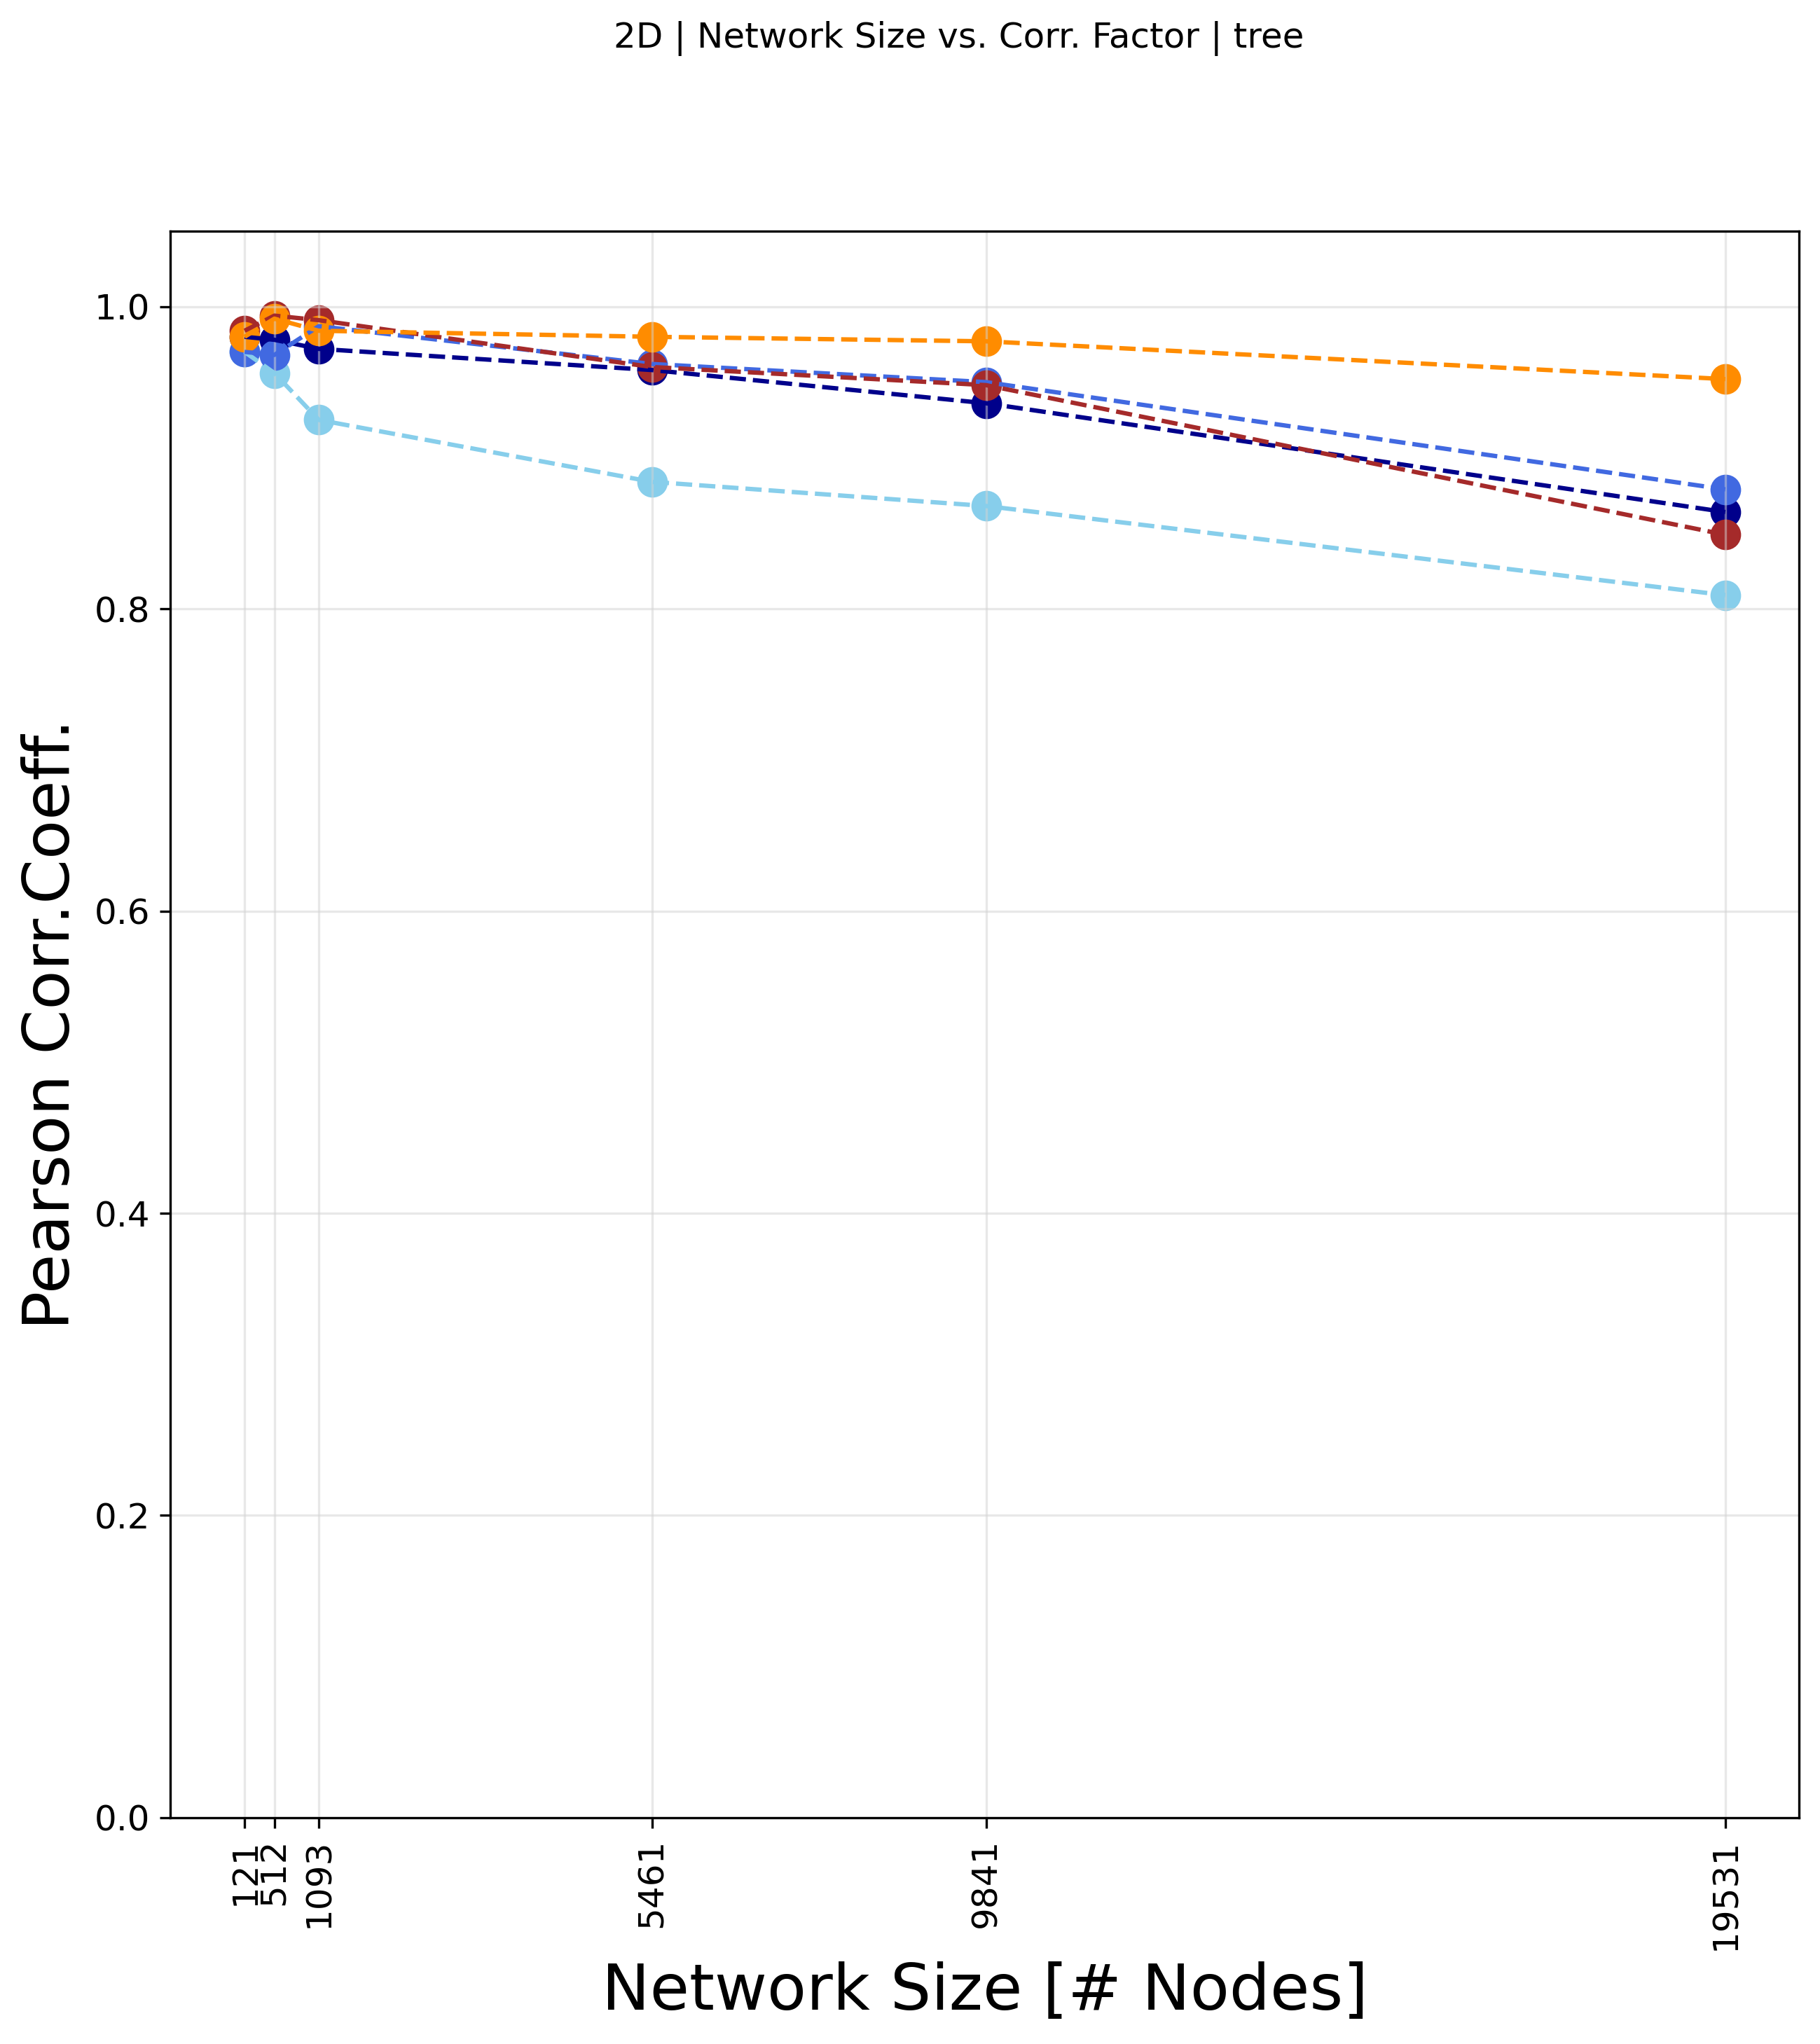

In [80]:
########################################
#
# Network size vs. Correlation Factor 
# with same running time
#
########################################

x_fa = net_sizes 
y_fa = list(d_netsize_corr_fa.values())

x_nx = net_sizes 
y_nx = list(d_netsize_corr_nx.values())

x_ig = net_sizes 
y_ig = list(d_netsize_corr_ig.values())

x_nodevec = net_sizes 
y_nodevec = list(d_netsize_corr_nodevec.values())

x_layout = net_sizes 
y_layout = list(d_netsize_corr_global.values())

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5) #,label='networkx')
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30*3, alpha = 1.0)

plt.plot(x_fa,y_fa, '--', c = 'darkblue', alpha = 1.0, linewidth=1.5) #,label='forceatlas2')
plt.scatter(x_fa,y_fa, c = 'darkblue', s = 30*3, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5) #,label='python-igraph')
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30*3, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5) #,label='cartographs')
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30*3, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5) #,label='cartographs')
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30*3, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('2D | Network Size vs. Corr. Factor | '+organism, fontsize=12)
plt.ylim(ymin=0, ymax=1.05)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_2D_CorrNetsize_'+organism+'_ig_nx_fa.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_2D_CorrNetsize_'+organism+'_ig_nx_fa.pdf')

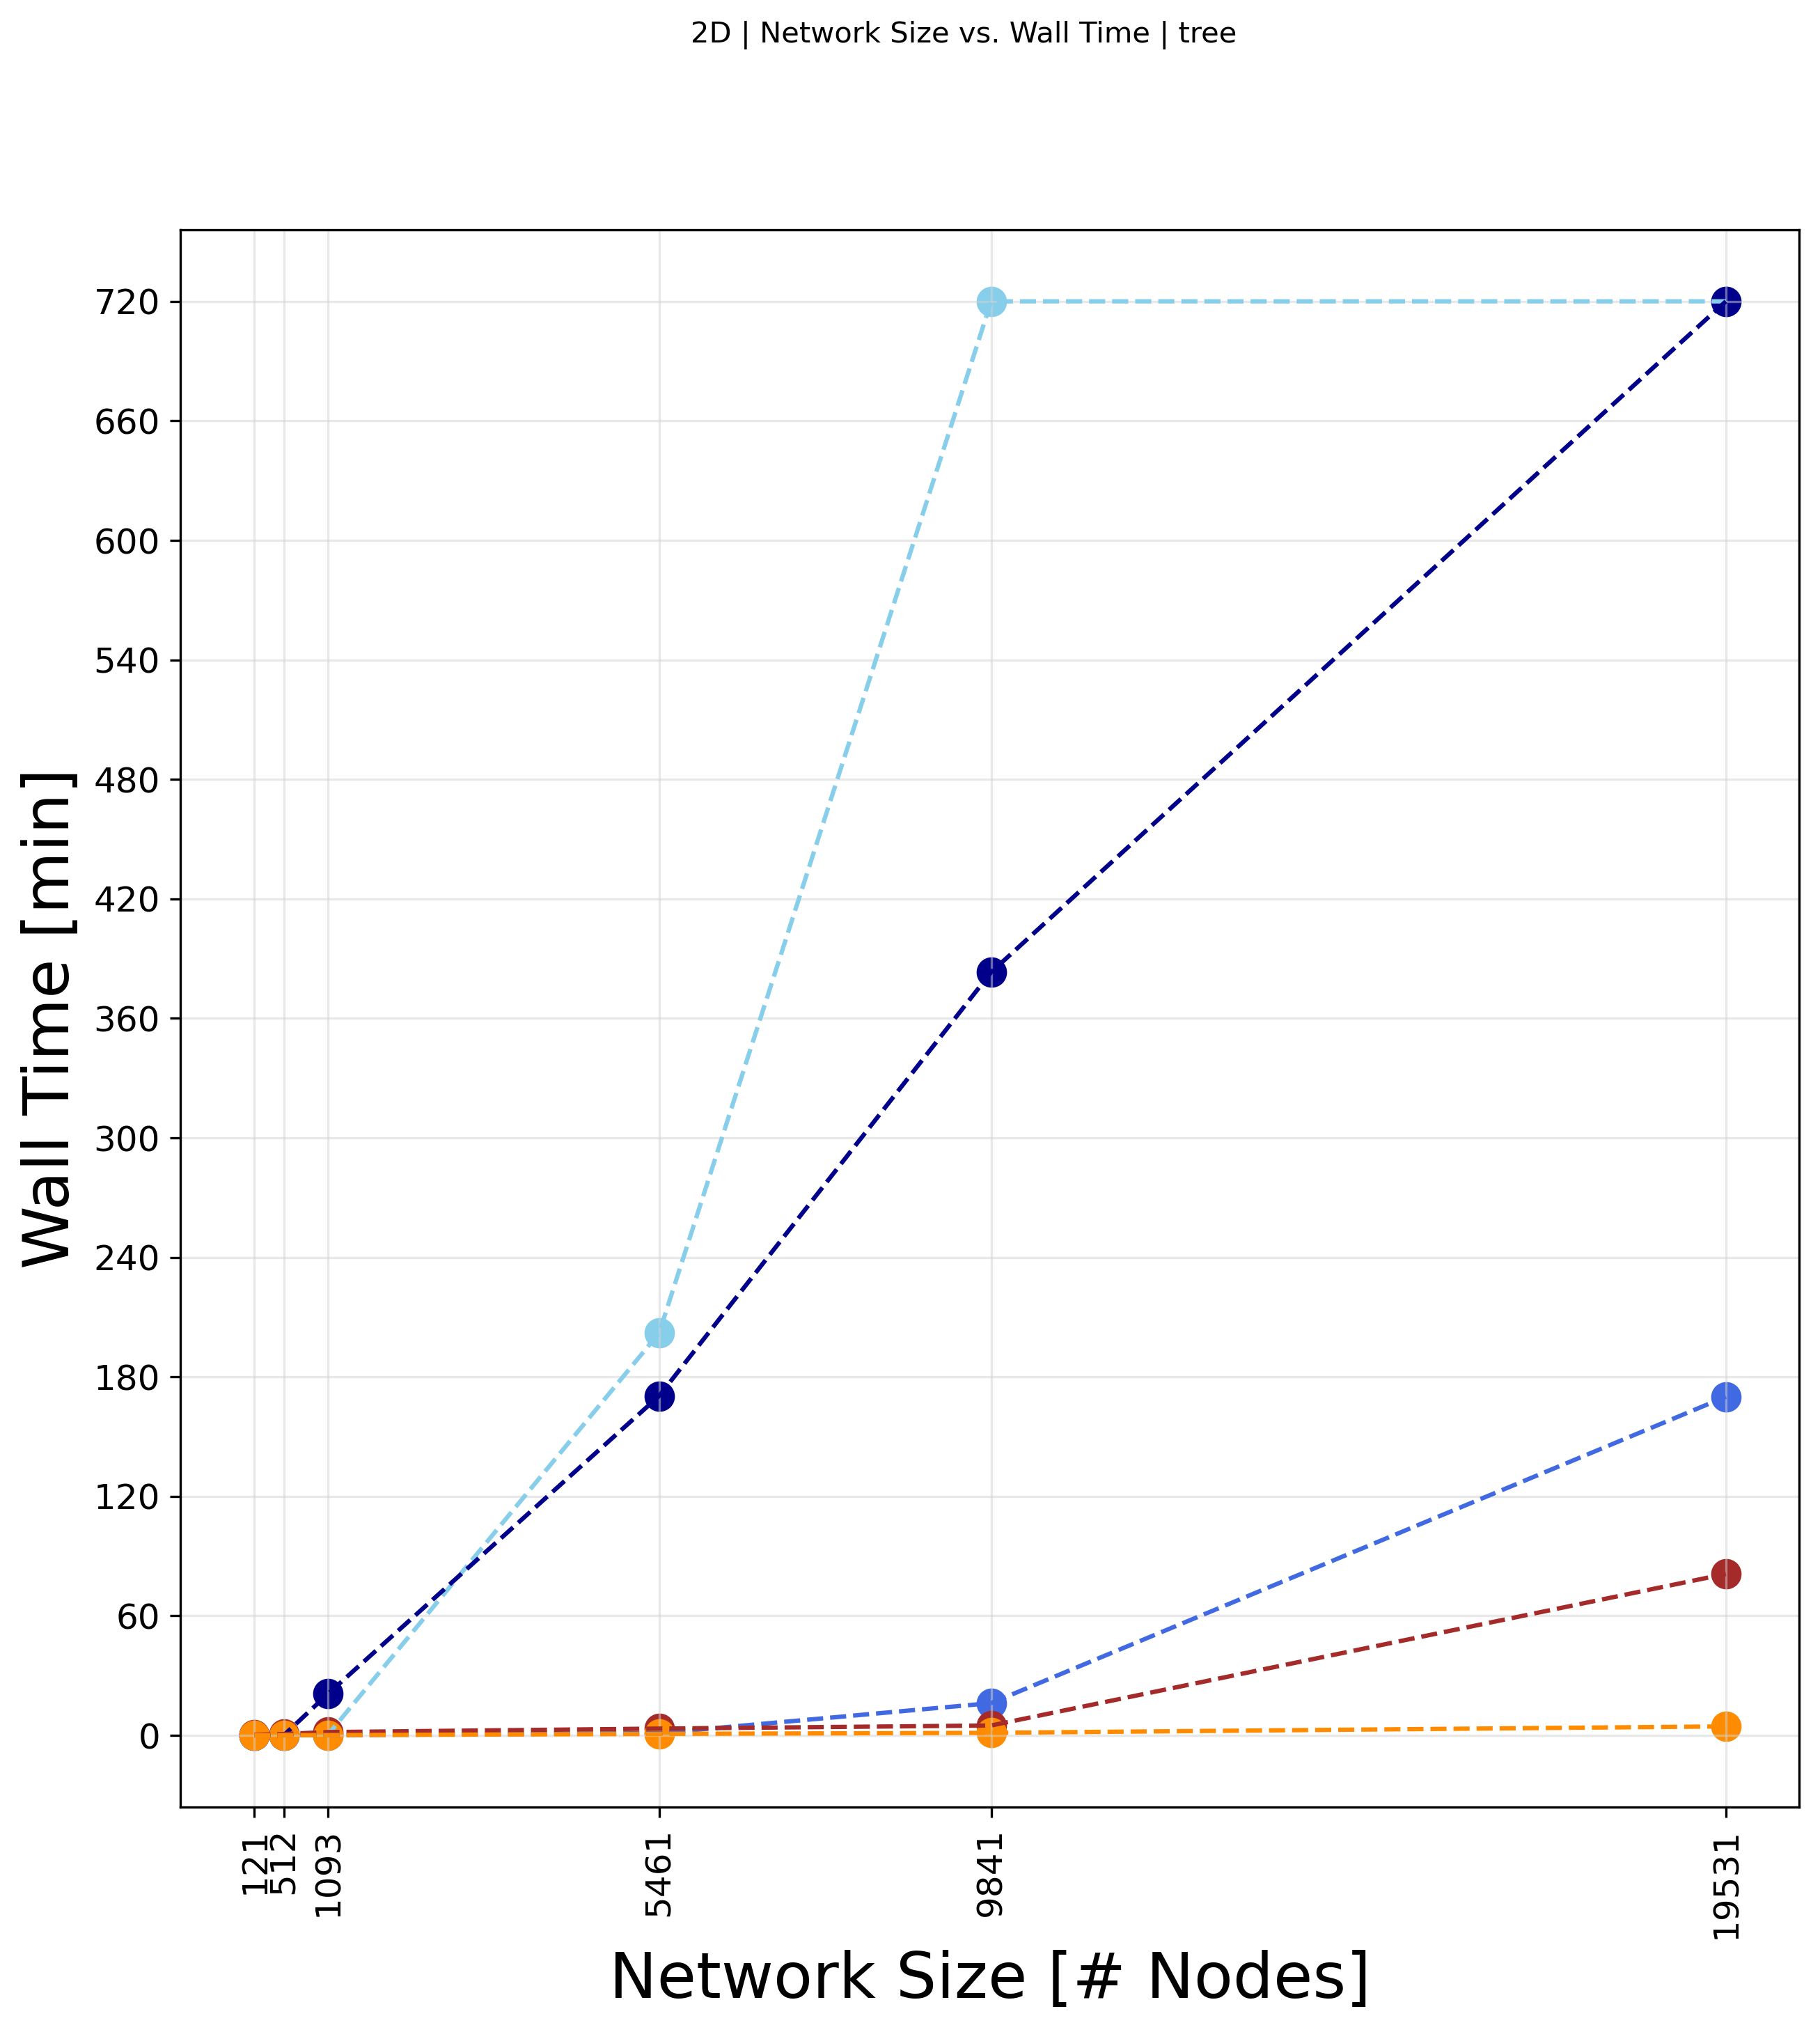

In [81]:
########################################
#
# Network size vs. time
# with same correlation factor
#
########################################

x_fa = net_sizes
y_fa = [(i/60) for i in d_netsize_time_fa.values()]# list(d_netsize_time_spring.values())

x_nx = net_sizes
y_nx = [(i/60) for i in d_netsize_time_nx.values()]# list(d_netsize_time_spring.values())

x_ig = net_sizes
y_ig = [(i/60) for i in d_netsize_time_ig.values()]# list(d_netsize_time_spring.values())

x_nodevec = net_sizes
y_nodevec = [(i/60) for i in d_netsize_time_nodevec.values()]# list(d_netsize_time_spring.values())

x_layout = net_sizes
y_layout = [(i/60) for i in d_netsize_time.values()]# list(d_netsize_time_spring.values())

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.yticks([0,60,120,180,240,300,360,420,480,540,600,660,720])
plt.ylabel("Wall Time [min]", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30*3, alpha = 1.0)

plt.plot(x_fa,y_fa, '--', c = 'darkblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_fa,y_fa, c = 'darkblue', s = 30*3, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30*3, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5) #,label='cartographs')
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30*3, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30*3, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('2D | Network Size vs. Wall Time | '+organism, fontsize=10)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_2D_TimeNetsize_'+organism+'_ig_nx_fa.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_2D_TimeNetsize_'+organism+'_ig_nx_fa.pdf')